In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm


In [ ]:
url="https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"

data=pd.read_csv(url,parse_dates=['Date'])

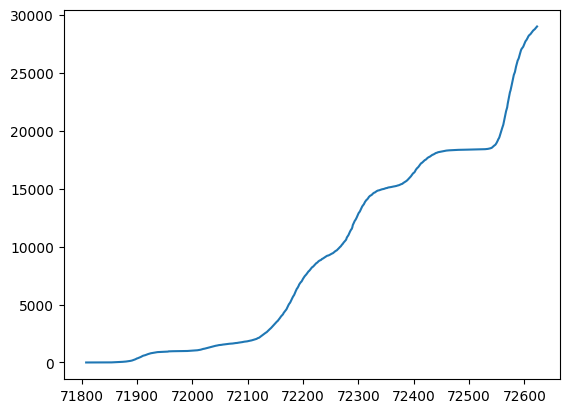

In [ ]:
country_data=data[data['Country']=="Japan"]

plt.plot(country_data['Deaths'])

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     1194.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          9.76e-162
Time:                        19:06:01   Log-Likelihood:                -12434.
No. Observations:                 816   AIC:                         2.487e+04
Df Residuals:                     814   BIC:                         2.488e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.805e+09    1.1e+08    -34.540   

<ipython-input-19-46685fb4b6cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Date_ordinal'] = country_data['Date'].apply(lambda x: x.toordinal())


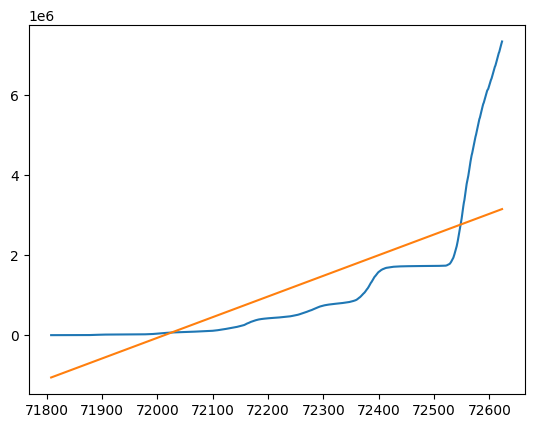

In [ ]:
country_data['Date_ordinal'] = country_data['Date'].apply(lambda x: x.toordinal())

X = sm.add_constant(country_data['Date_ordinal'])

model = sm.OLS(country_data['Confirmed'],X)
results = model.fit()

# Step 4: Print the summary of the regression
print(results.summary())

pred=results.predict(X)

plt.plot(country_data['Confirmed'])
plt.plot(pred)


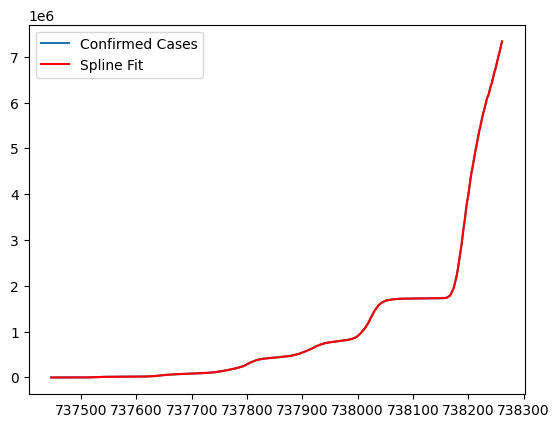

In [ ]:
from scipy.interpolate import UnivariateSpline

# Fit the spline to the data
spl = UnivariateSpline(country_data['Date_ordinal'], country_data['Confirmed'], s=0)  # s is a smoothing factor
pred_spline = spl(country_data['Date_ordinal'])

# Plot the original data and the spline prediction
plt.plot(country_data['Date_ordinal'], country_data['Confirmed'], label='Confirmed Cases')
plt.plot(country_data['Date_ordinal'], pred_spline, label='Spline Fit', color='red')
plt.legend()
plt.show()

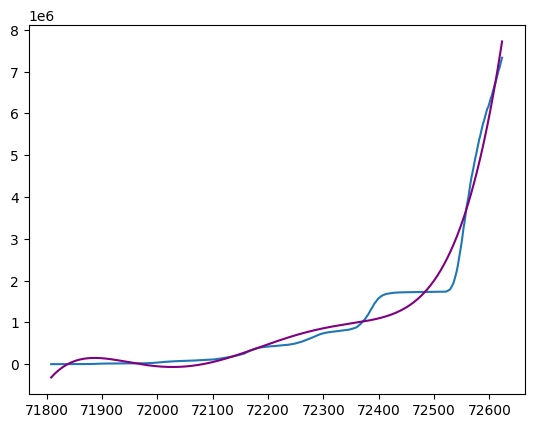

In [ ]:
from numpy.polynomial.polynomial import Polynomial

poly = Polynomial.fit(country_data['Date_ordinal'], country_data['Confirmed'],5)
pred_poly = poly(country_data['Date_ordinal'])

plt.plot(country_data['Confirmed'])
plt.plot(pred_poly,color='purple')


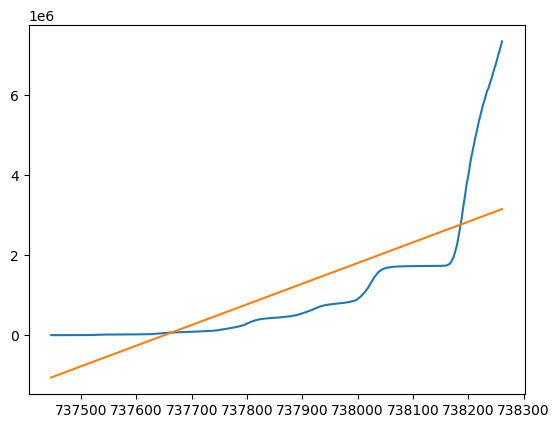

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X, country_data['Confirmed'])
pred_ridge = ridge.predict(X)

plt.plot(country_data['Date_ordinal'],country_data['Confirmed'])
plt.plot(country_data['Date_ordinal'],pred_ridge)


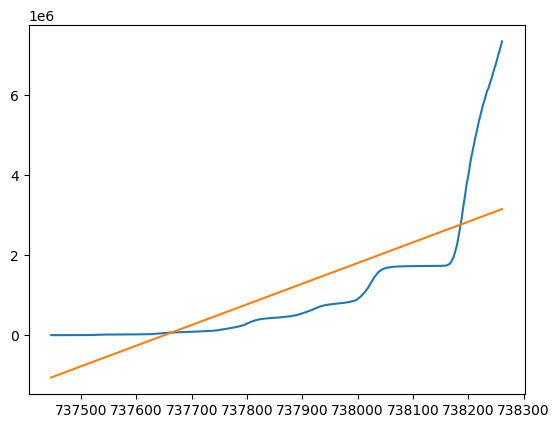

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X, country_data['Confirmed'])
pred_lasso = lasso.predict(X)

plt.plot(country_data['Date_ordinal'],country_data['Confirmed'])
plt.plot(country_data['Date_ordinal'],pred_lasso)
